In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import textdataset as ds
import textprep as pr
import textrec as tr

In [2]:
topdir = '/Users/atadenizaydin/Documents/course material/cs491/SimpleHTR/data'

In [3]:
%%time
iam = ds.IAMDataset('words', topdir, msb=True, tabulate=True, sort=True)

CPU times: user 41.9 s, sys: 1.18 s, total: 43.1 s
Wall time: 51.8 s


In [4]:
%%time
iam100 = pr.IAMTrainDataset(iam, 'train100', 100, verbose=True, create=False, normalize=False)

Processing 41 batches of 4031 images of width 16 (1/31)
Processing 137 batches of 13672 images of width 32 (2/31)
Processing 161 batches of 16008 images of width 48 (3/31)
Processing 160 batches of 15996 images of width 64 (4/31)
Processing 135 batches of 13493 images of width 80 (5/31)
Processing 105 batches of 10438 images of width 96 (6/31)
Processing 74 batches of 7342 images of width 112 (7/31)
Processing 52 batches of 5146 images of width 128 (8/31)
Processing 36 batches of 3507 images of width 144 (9/31)
Processing 24 batches of 2334 images of width 160 (10/31)
Processing 16 batches of 1533 images of width 176 (11/31)
Processing 11 batches of 1037 images of width 192 (12/31)
Processing 7 batches of 678 images of width 208 (13/31)
Processing 5 batches of 443 images of width 224 (14/31)
Processing 3 batches of 281 images of width 240 (15/31)
Processing 2 batches of 155 images of width 256 (16/31)
Processing 2 batches of 124 images of width 272 (17/31)
Processing 1 batches of 79 im

In [5]:
%%time
iamtr50 = pr.IAMTrainDataset(iam, 'train50', 50, verbose=True, create=False, normalize=False)

Processing 81 batches of 4031 images of width 16 (1/31)
Processing 274 batches of 13672 images of width 32 (2/31)
Processing 321 batches of 16008 images of width 48 (3/31)
Processing 320 batches of 15996 images of width 64 (4/31)
Processing 270 batches of 13493 images of width 80 (5/31)
Processing 209 batches of 10438 images of width 96 (6/31)
Processing 147 batches of 7342 images of width 112 (7/31)
Processing 103 batches of 5146 images of width 128 (8/31)
Processing 71 batches of 3507 images of width 144 (9/31)
Processing 47 batches of 2334 images of width 160 (10/31)
Processing 31 batches of 1533 images of width 176 (11/31)
Processing 21 batches of 1037 images of width 192 (12/31)
Processing 14 batches of 678 images of width 208 (13/31)
Processing 9 batches of 443 images of width 224 (14/31)
Processing 6 batches of 281 images of width 240 (15/31)
Processing 4 batches of 155 images of width 256 (16/31)
Processing 3 batches of 124 images of width 272 (17/31)
Processing 2 batches of 79

In [7]:
trec = tr.TextRecognizer(path='../../models/trec_words_100.pt')

In [8]:
# trec.load('../models/trec_words_100.pt')

In [9]:
s = iam.samlist[50000]
a = cv2.imread(s.path, cv2.IMREAD_GRAYSCALE)

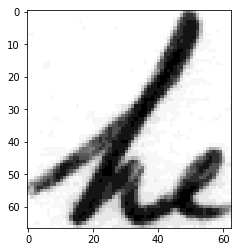

In [10]:
plt.imshow(a, cmap='gray')
plt.show()

In [11]:
h, w = a.shape
h, w = 32, int(w/h*32)
ab = cv2.resize(a, (w, h))
ab = cv2.threshold(ab, s.thres, 255, cv2.THRESH_BINARY)[1]

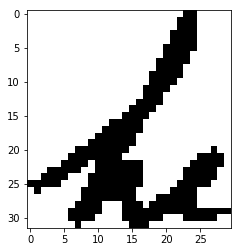

In [12]:
plt.imshow(ab, cmap='gray')
plt.show()

In [13]:
trec.infer(ab)

['he']

In [14]:
trec.infer(cv2.resize(a, (w, h)))

['he']

In [15]:
sb = iamtr50.samlist[-100]
bb = np.load(sb.path)

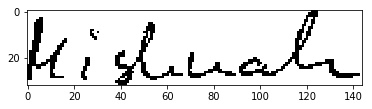

In [16]:
plt.imshow(bb[30], cmap='gray')
plt.show()

In [17]:
sb.text[sum(sb.lengths[:30]):sum(sb.lengths[:31])]

'Mishnah'

In [18]:
strs = trec.infer(bb)
strs[30]

'mishnah'

In [19]:
trec.validatebatch(sb)

0.44

In [20]:
%%time
dists = trec.validate(iamtr50.samlist[1100:1200])

Iteration 2 threw exception
Iteration 5 threw exception
Iteration 10: 0.160000
Iteration 14 threw exception
Iteration 19 threw exception
Iteration 20: 0.420000
Iteration 23 threw exception
Iteration 30: 0.500000
Iteration 36 threw exception
Iteration 40: 0.400000
Iteration 41 threw exception
Iteration 45 threw exception
Iteration 49 threw exception
Iteration 50: 0.200000
Iteration 53 threw exception
Iteration 55 threw exception
Iteration 56 threw exception
Iteration 59 threw exception
Iteration 60: 0.280000
Iteration 60 threw exception
Iteration 61 threw exception
Iteration 66 threw exception
Iteration 70: 0.360000
Iteration 70 threw exception
Iteration 72 threw exception
Iteration 75 threw exception
Iteration 80: 0.220000
Iteration 84 threw exception
Iteration 88 threw exception
Iteration 90: 0.220000
Iteration 95 threw exception
Iteration 100: 0.220000
CPU times: user 3min 51s, sys: 20 s, total: 4min 11s
Wall time: 3min 13s


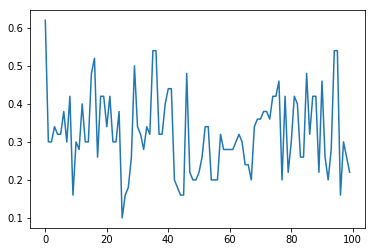

In [21]:
plt.plot(dists)
plt.show()